In [77]:
import pandas as pd
from pandas import Series, DataFrame


In [78]:
import numpy as np

In [79]:
address='C:/Users/adila/Documents/Customer_Behaviour.csv'
conbeh=pd.read_csv(address)

conbeh.columns = ['Id', 'gender','age', 'salary', 'buy']
conbeh


,Id,gender,age,salary,buy
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [80]:
buy=conbeh.buy
gender=conbeh.gender
age=conbeh.age
salary=conbeh.salary

In [81]:
buy1 = conbeh.drop('Id', axis=1)
buy1.head()

,gender,age,salary,buy
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


First, I dropped the ID column for a cleaner view of the data. Now I have three features that might affect if the consumer will or will not buy the product. These are gender, age and estimated salary. Using the information from these, I will understand how likely a consumer is to buy this product. This would be very important when targeting a population for the ads. It would be financially very beneficial for any company to target people who are more likely to purchase products. First I need to gain further information about my variables.

# Gender

In [82]:
gender.value_counts()

Female    204
Male      196
Name: gender, dtype: int64

In terms of gender, data is pretty balanced. Female=204, Male=196. That is good news since imbalance, although there are ways to control it, can be open to error.

# Age

In [83]:
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sns
import scipy
from scipy import stats

%matplotlib inline
rcParams['figure.figsize'] = 6, 4

C:\Users\adila\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

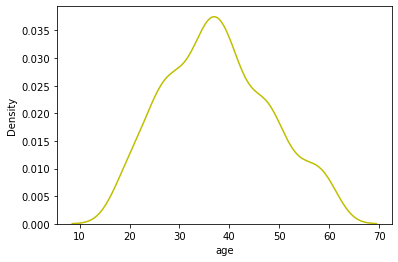

In [84]:
sns.distplot(age, hist=False, color='y')

In [85]:
age.describe()

count    400.000000
mean      37.655000
std       10.482877
min       18.000000
25%       29.750000
50%       37.000000
75%       46.000000
max       60.000000
Name: age, dtype: float64

<AxesSubplot:xlabel='age'>

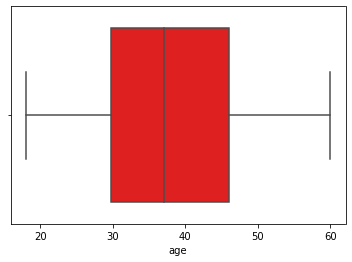

In [86]:
sns.boxplot(x=age, color='r')

Seems like there are no outliers!

# Salary

C:\Users\adila\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

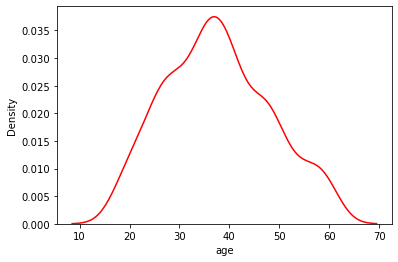

In [87]:
sns.distplot(age, hist=False, color='r')

In [88]:
salary.describe()

count       400.000000
mean      69742.500000
std       34096.960282
min       15000.000000
25%       43000.000000
50%       70000.000000
75%       88000.000000
max      150000.000000
Name: salary, dtype: float64

<AxesSubplot:xlabel='salary'>

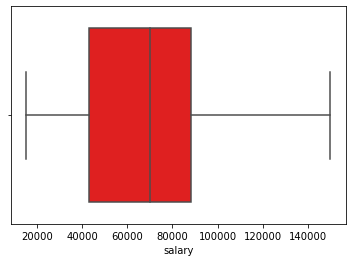

In [89]:
sns.boxplot(x=salary, color='r')

In [90]:
IQR=88000-43000
y=1.5*IQR
low=43000-y
high=88000+y
print(low,high,IQR)


-24500.0 155500.0 45000


Just to be sure, it is also possible to check this with given way, no outlier!!

# Buy or Not?

In [91]:
buy.value_counts()

0    257
1    143
Name: buy, dtype: int64

257 people did not buy the product and 143 people did in the current dataset. This variable is not that balanced. I will keep that in mind.

Let's first check the relationship of variables

<AxesSubplot:>

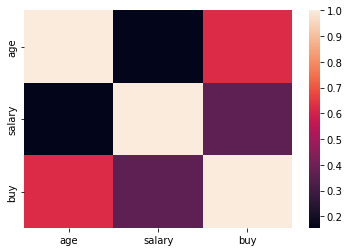

In [92]:
import seaborn as sb
sb.heatmap(buy1.corr())

nothing special

# Cheking for missing values

In [93]:
buy1.isnull().sum()

gender    0
age       0
salary    0
buy       0
dtype: int64

no missing values, great!

# Logistic Regression

In [94]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score

In [95]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
gender_cat=buy1['gender']
gender_encoded=label_encoder.fit_transform(gender_cat)
gender_encoded[0:5]

array([1, 1, 0, 0, 1])

In [96]:
#male=1, female=0
malegen=pd.DataFrame(gender_encoded, columns=['malegen'])
buy1.drop(['gender'], axis=1, inplace=True)


In [97]:
conbehDF=pd.concat([buy1, malegen], axis=1, verify_integrity=True).astype(float)
conbehDF

,age,salary,buy,malegen
0,19.0,19000.0,0.0,1.0
1,35.0,20000.0,0.0,1.0
2,26.0,43000.0,0.0,0.0
3,27.0,57000.0,0.0,0.0
4,19.0,76000.0,0.0,1.0
...,...,...,...,...
395,46.0,41000.0,1.0,0.0
396,51.0,23000.0,1.0,1.0
397,50.0,20000.0,1.0,0.0
398,36.0,33000.0,0.0,1.0


In [98]:
X_train,X_test,y_train,y_test=train_test_split(conbehDF.drop('buy', axis=1),
                                              conbehDF['buy'], test_size=0.2)

In [99]:
LogReg=LogisticRegression(solver='liblinear')
LogReg.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [100]:
y_pred=LogReg.predict(X_test)

In [101]:
y_train_pred=cross_val_predict(LogReg, X_train, y_train, cv=20)
confusion_matrix(y_train,y_train_pred)

array([[211,   0],
       [109,   0]], dtype=int64)

In [102]:
#According to our confusion matrix, the overall accuracy is
(176+88)/(176+88+22+34)

0.825

with 82% accuracy, the model is able to predict if the customer will or will not buy the item.

In [103]:
from scipy.stats import pearsonr
corr, _ = pearsonr(buy, salary)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.362


In [104]:
corr, _ = pearsonr(buy, age)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.622


Interestingly, the relationship between salary and purchase behavior is not as important as age according to correlation. Although, people with higher salary would be expected to purchase more, human behavior is not that simple. I have no information about the product but it could be the case that people with higher salary would choose a better product with a higher price, lets check the relationship between price and purchase behavior more closely:

In [105]:
salary.describe()

count       400.000000
mean      69742.500000
std       34096.960282
min       15000.000000
25%       43000.000000
50%       70000.000000
75%       88000.000000
max      150000.000000
Name: salary, dtype: float64

In [106]:
salarylevel = pd.cut(x=conbehDF['salary'], bins=[0, 43000, 70000, 88000, 155000],
                     labels=['a', 'b', 'c','d'])



In [107]:
conbehDF['Salarylevel']=salarylevel
conbehDF

,age,salary,buy,malegen,Salarylevel
0,19.0,19000.0,0.0,1.0,a
1,35.0,20000.0,0.0,1.0,a
2,26.0,43000.0,0.0,0.0,a
3,27.0,57000.0,0.0,0.0,b
4,19.0,76000.0,0.0,1.0,c
...,...,...,...,...,...
395,46.0,41000.0,1.0,0.0,a
396,51.0,23000.0,1.0,1.0,a
397,50.0,20000.0,1.0,0.0,a
398,36.0,33000.0,0.0,1.0,a


In [108]:
relbuysalary = conbehDF[(conbehDF['buy'] == 1)]
relbuysalary.Salarylevel.value_counts()

d    75
a    39
c    19
b    10
Name: Salarylevel, dtype: int64

very interesting relationship, people with highest salary purchased more, followed by people with lowest salary.

In [109]:
table=pd.crosstab(buy,salarylevel)
from scipy.stats import chi2_contingency
chi2,p,dof,expected=chi2_contingency(table.values)
print('Chi-square %0.3f p_value %0.3f'%(chi2,p))

Chi-square 122.444 p_value 0.000


In [110]:
table

salary,a,b,c,d
buy,,,,
0,63,91,84,19
1,39,10,19,75


p value <0.05, these variables are not independent, thus there is a relationship between.

<AxesSubplot:title={'center':'salary'}, xlabel='buy'>

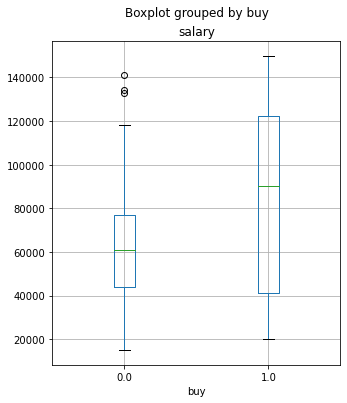

In [111]:
conbehDF.boxplot(column='salary', by='buy', figsize=(5,6))

# K means clustering for customer segmentation

In [112]:
import matplotlib.pyplot as plt
import seaborn 
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

In [113]:
col_names = ['age', 'salary']
features = conbehDF[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_features = pd.DataFrame(features, columns = col_names)
scaled_features

,age,salary
0,-1.781797,-1.490046
1,-0.253587,-1.460681
2,-1.113206,-0.785290
3,-1.017692,-0.374182
4,-1.781797,0.183751
...,...,...
395,0.797057,-0.844019
396,1.274623,-1.372587
397,1.179110,-1.460681
398,-0.158074,-1.078938


age and salary was standardized

In [114]:
conbehDF = conbehDF.drop('Salarylevel', axis=1)
conbehDF.head()

,age,salary,buy,malegen
0,19.0,19000.0,0.0,1.0
1,35.0,20000.0,0.0,1.0
2,26.0,43000.0,0.0,0.0
3,27.0,57000.0,0.0,0.0
4,19.0,76000.0,0.0,1.0


C:\Users\adila\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Text(0, 0.5, 'Inertia')

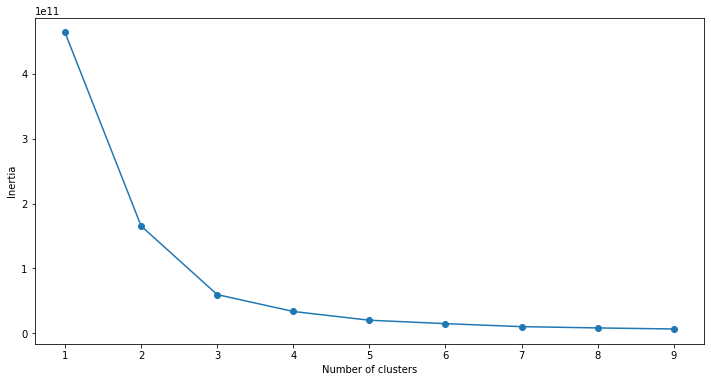

In [115]:

SSE = []

for cluster in range(1,10):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(conbehDF)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them

frame = pd.DataFrame({'Cluster':range(1,10), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

considering the elbow method, I will choose 3 clusters.

In [116]:
kmeans = KMeans( n_clusters = 3, init='k-means++')
kmeans.fit(conbehDF)

# Now, print the silhouette score of this model

print(silhouette_score(conbehDF, kmeans.labels_, metric='euclidean'))

0.6014957541612468


In [117]:
conbehDF.head()

,age,salary,buy,malegen
0,19.0,19000.0,0.0,1.0
1,35.0,20000.0,0.0,1.0
2,26.0,43000.0,0.0,0.0
3,27.0,57000.0,0.0,0.0
4,19.0,76000.0,0.0,1.0


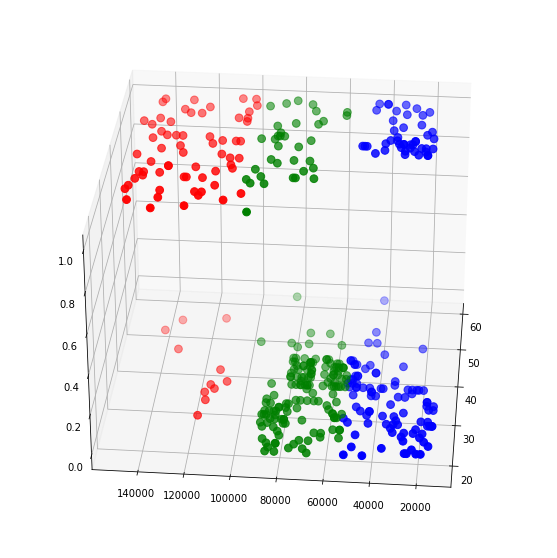

In [128]:
clusters = kmeans.fit_predict(conbehDF.iloc[:,1:])
conbehDF["label"] = clusters
 
fig = plt.figure(figsize=(21,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(conbehDF.age[conbehDF.label == 0], conbehDF["salary"][conbehDF.label == 0], conbehDF["buy"][conbehDF.label == 0], c='blue', s=60)

ax.scatter(conbehDF.age[conbehDF.label == 1], conbehDF["salary"][conbehDF.label == 1], conbehDF["buy"][conbehDF.label == 1], c='red', s=60)
ax.scatter(conbehDF.age[conbehDF.label == 2], conbehDF["salary"][conbehDF.label == 2], conbehDF["buy"][conbehDF.label == 2], c='green', s=60)


ax.view_init(30, 185)
plt.show()

# Lets check the clusters

In [122]:
label=conbehDF['label']
label.value_counts()

2    185
1    141
0     74
Name: label, dtype: int64

In [123]:
avg_conbehDF = conbehDF.groupby(['label']).mean()
avg_conbehDF[['age','salary']]

,age,salary
label,,
0,42.783784,125310.810811
1,37.673759,34787.234043
2,35.589189,74156.756757


In [124]:
gender_labels = pd.DataFrame(conbehDF.groupby(['label','malegen'])['malegen'].count())
gender_labels.head()

malegen
label malegen         
0     0.0           45
      1.0           29
1     0.0           74
      1.0           67
2     0.0           85

In [125]:
buy_labels = pd.DataFrame(conbehDF.groupby(['label','buy'])['buy'].count())
buy_labels.head()

buy
label buy     
0     0.0   11
      1.0   63
1     0.0   96
      1.0   45
2     0.0  150

2    185
1    141
0     74
number of people in clusters

In [126]:
45/141

0.3191489361702128

In [127]:
63/74

0.8513513513513513

According to this, Cluster 0 has a probability of 85% to purchase the product, followed by cluster 1 which is 30%.

People in the cluster 2 has never purchased the product.